# Regression Playgrounds

In [3]:
from sklearn import linear_model
from sklearn import datasets
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'
sns.set()

In [22]:
n = 8
blue_slope = .7
red_slope = .4

sample_data1, _ = datasets.make_blobs(n, cluster_std=2, centers=[0,0], random_state=23)
sample_data2, _ = datasets.make_blobs(n, cluster_std=4, centers=[0,0], random_state=232)
sample_data1[:,1] += sample_data1[:,0] * blue_slope
sample_data2[:,1] += sample_data2[:,0] * red_slope
sample_data2 += [50,-40]
normalized_sample_data1 = sample_data1 - sample_data1.mean(axis=0)
normalized_sample_data2 = sample_data2 - sample_data2.mean(axis=0)
sample = np.vstack((sample_data1, sample_data2))
normalized_sample = np.vstack((normalized_sample_data1, normalized_sample_data2))

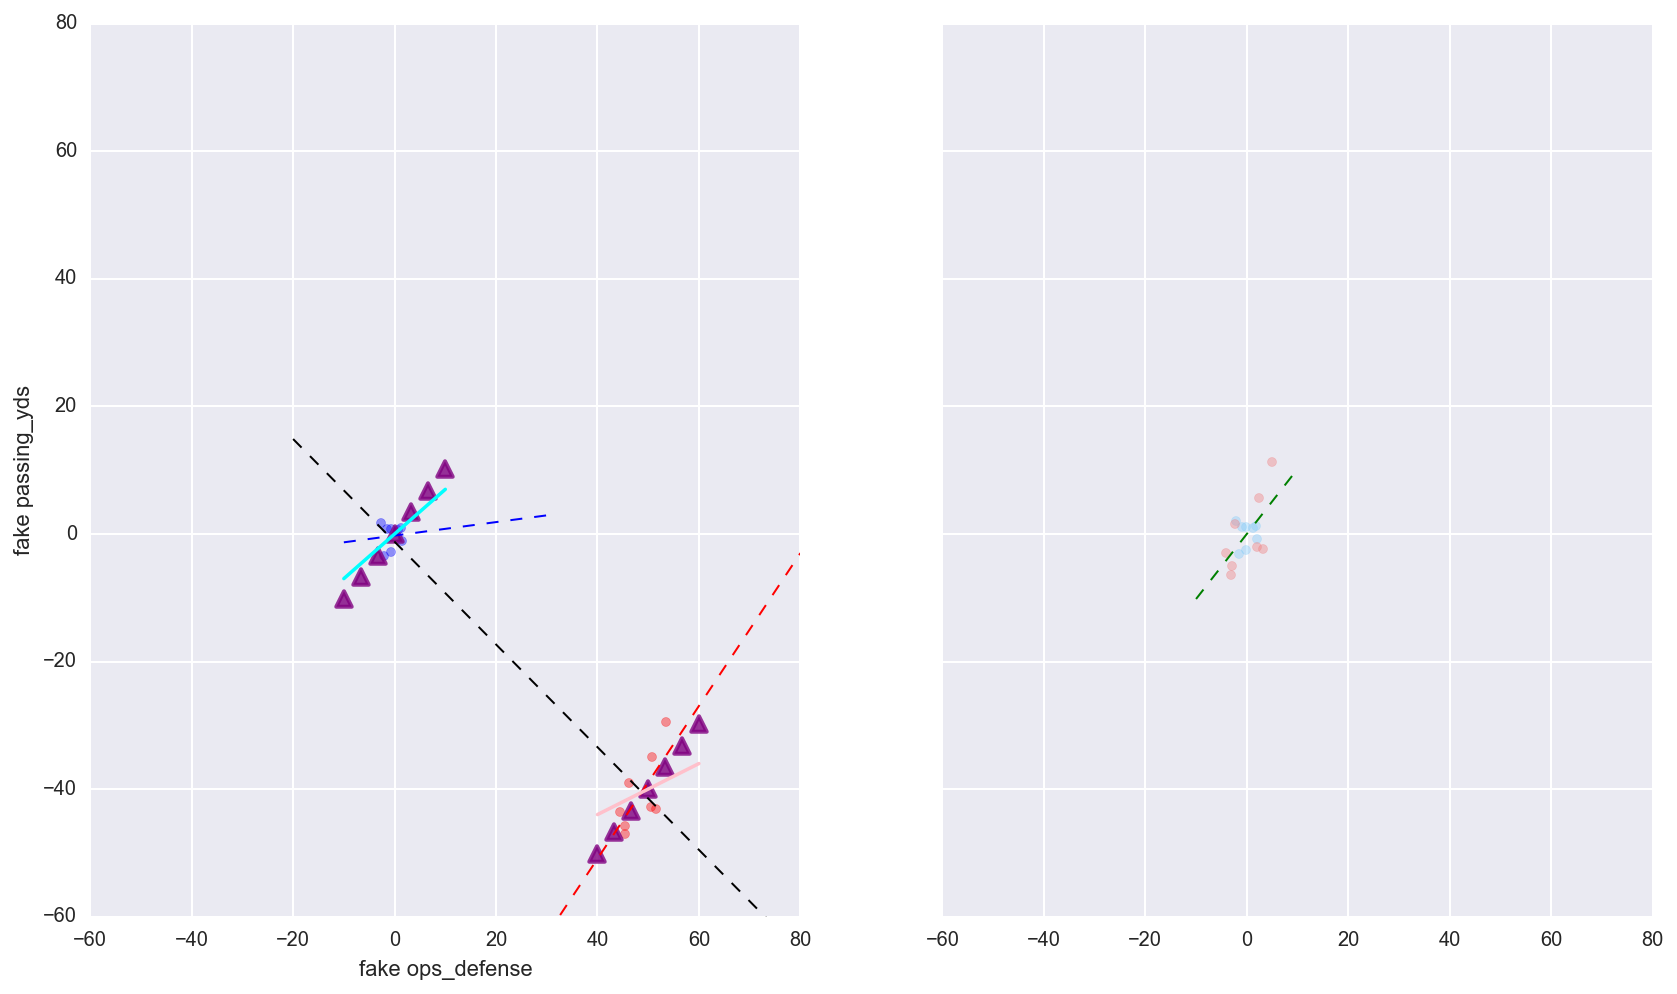

In [23]:
regr = linear_model.LinearRegression()
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr_n = linear_model.LinearRegression()

regr.fit(sample[:,0:1], y=sample[:,1])
regr1.fit(sample_data1[:,0:1], y=sample_data1[:,1])
regr2.fit(sample_data2[:,0:1], y=sample_data2[:,1])
regr_n.fit(normalized_sample[:,0:1], y=normalized_sample[:,1])


fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14,8))
ax1.scatter(sample_data1[:,0], sample_data1[:,1],color="b",alpha=.4)
ax1.scatter(sample_data2[:,0], sample_data2[:,1],color="r",alpha=.4)

x = np.c_[ -10, 30].T
ax1.plot(x,regr1.predict(x), ls="--", lw=1, color='b')
x = np.c_[ 0, 20].T
ax1.plot(x-10, (blue_slope*x)-(blue_slope*10), color='cyan')


x = np.c_[ 20, 80].T
ax1.plot(x,regr2.predict(x), ls="--", lw=1, color='r')
x = np.c_[ 0, 20].T

ax1.plot(x+50-10, (red_slope*x)-40-(red_slope*10), color='pink')



x = np.c_[ -20, 80].T
ax1.plot(x,regr.predict(x), ls="--", lw=1, color='black')

x = np.c_[ -10, 10].T
ax2.plot(x,regr_n.predict(x), ls="--", lw=1, color='green')



ax2.scatter(normalized_sample_data1[:,0], normalized_sample_data1[:,1],
            alpha=.4, color="lightskyblue")
ax2.scatter(normalized_sample_data2[:,0], normalized_sample_data2[:,1],
            alpha=.4, color="lightcoral")

ax1.set_ylabel("fake passing_yds")
ax1.set_xlabel("fake ops_defense")

ax1.set_xlim((-60,80))
ax1.set_ylim((-60,80))

#ax.plot(x,regr.predict(x), ls="--", lw=2, color='')
#ax.plot(x,regr_n.predict(x), ls=":", lw=2, color='palegreen')

new_defense = np.atleast_2d(np.linspace(-10,10,7)).T
ax1.scatter(new_defense+0, regr_n.predict(new_defense)+0, marker="^", color='purple', lw=2,s=60, alpha=.8)


ax1.scatter(new_defense+50, regr_n.predict(new_defense)+(-40), marker="^", color='purple', lw=2,s=60, alpha=.8)



In [24]:
regr1.coef_

array([ 0.1056903])

In [25]:
regr_n.coef_

array([ 1.0196709])

In [27]:
blue_slope # the true

0.7

In [28]:
regr2.coef_

array([ 1.1982121])

In [29]:
red_slope

0.4

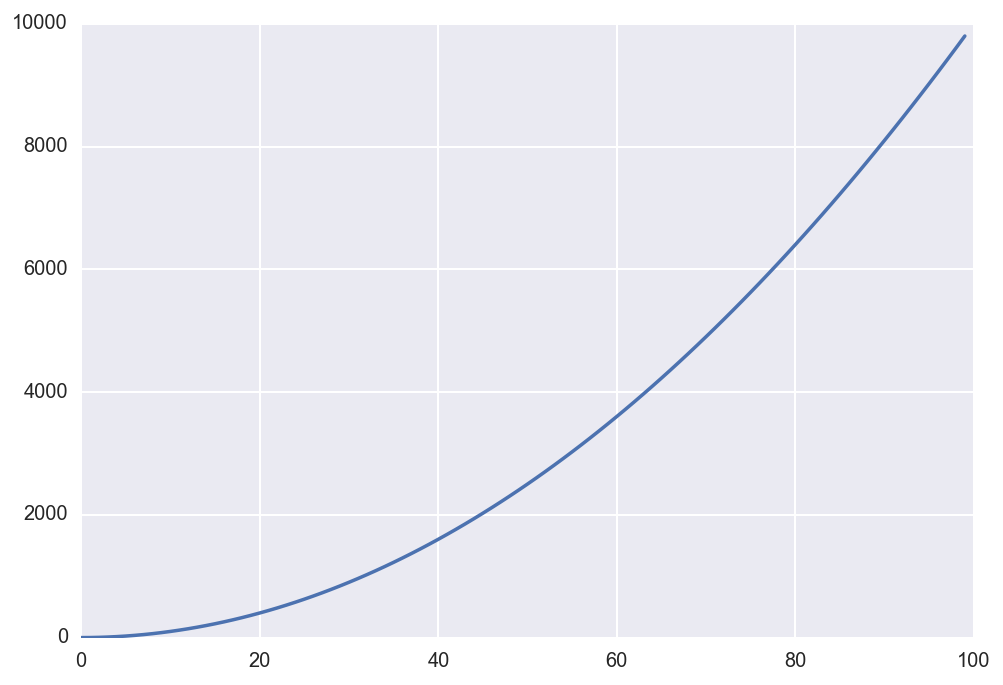

In [33]:
fig, ax = plt.subplots()
ax.plot(range(100), np.arange(100)**2)